<a href="https://colab.research.google.com/github/sparkysparo/Machine-Learning-for-Early-Prediction-Detection-and-Monitoring-of-Sepsis-in-A-E-and-ICU/blob/main/Project_MSC_Machine_Learning_for_Early_Prediction%2CDetection_and_Monitoring_of_Sepsis_in_A%26E_and_ICU_Settings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Topic: Machine Learning for Early Prediction,Detection and Monitoring of Sepsis in A&E and ICU Settings.**

**Research Question:** How can Machine Learning models (Logistic Regression, XGBoost, and Gradient Boosting) be utilised to improve early detection, prediction, and monitoring of sepsis in A&E and ICU, thereby reducing patient mortality rates and enhancing clinical decision-making?

# **Notebook Setup and Installation of Needed Library**

In [83]:
# Data handling
import pandas as pd
import numpy as np
import threadpoolctl

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import seaborn as sns
import seaborn as sn
import shap
import matplotlib.pyplot as plt


# Statistics
from scipy import stats
from scipy.stats import shapiro, trim_mean, mstats, mode, ttest_ind

# Feature Processing (Scikit-learn processing, etc. )
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from collections import Counter

# Balance data
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
from sklearn.linear_model import LogisticRegression
from scipy.stats import randint, uniform
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, roc_auc_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Evaluations
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, RocCurveDisplay, roc_curve, auc
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, cross_val_score
from statistics import stdev
from sklearn.model_selection import KFold

# Other packages
import os, joblib

import warnings
warnings.filterwarnings("ignore")

#**Connecting Google Drive**

In [84]:
# Import and mount Google Drive.
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
# Navigating to the dataset folder in Google Drive
os.chdir('/content/drive/My Drive/Msc Data Science Project')

# **Loading The Dataset**

In [86]:
# Loading The  datasets
train_data = pd.read_csv('Paitients_Files_Train .csv')

# **Dataset Overview**

In [87]:
# Displaying the first five rows.
train_data.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [88]:
# Dispalying the last five rows.
train_data.tail()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
594,ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
595,ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive
596,ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative
597,ICU200607,1,89,24,19,25,27.8,0.559,21,0,Negative
598,ICU200608,1,173,74,0,0,36.8,0.088,38,1,Positive


In [89]:
# Dataset Information
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [90]:
# Dataset Description
train_data.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [91]:
# Displaying the shape of the dataset
train_data.shape

(599, 11)

In [92]:
#Checking for missing values
train_data.isnull().sum()

,0
ID,0
PRG,0
PL,0
PR,0
SK,0
TS,0
M11,0
BD2,0
Age,0
Insurance,0


<Axes: >

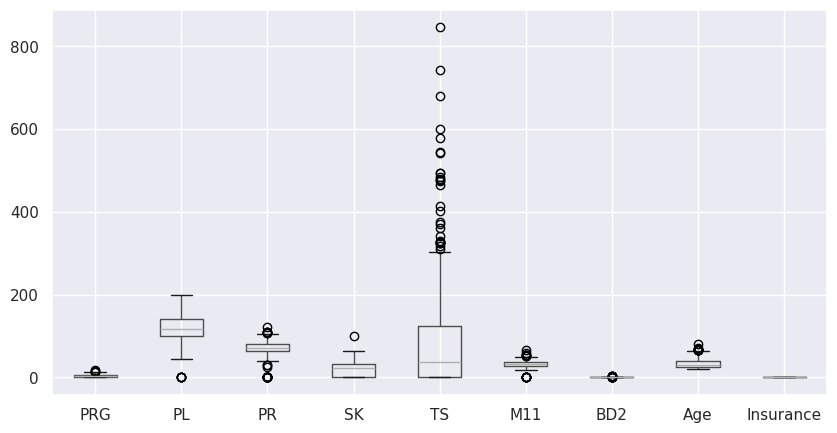

In [93]:
#Checking for outliers
train_data.boxplot(figsize=(10,5))

**Data Set Column Description**

---



ID - Unique number to represent patient ID

PRG - Plasma glucose

PL - Blood Work Result-1 (mu U/ml)

PR - Blood Pressure (mm Hg)

SK - Blood Work Result-2 (mm)

TS - Blood Work Result-3 (mu U/ml)

M11 - Body mass index (weight in kg/(height in m)^2

BD2 - Blood Work Result-4 (mu U/ml)

Age - patients age (years)

Insurance - If a patient holds a valid insurance card

Sepssis Target Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise

**Issues With the Data**


---


Too many zeros in each columns


1.The column names are not very descriptive.

2.The target variable 'Sepssis' may have imbalanced classes.

3.There are many outliers in some of the numerical columns.

4.There could be correlations between some of the predictor variables, leading to multicollinearity.

**How i Intend to Solve Them**


---


1.Replace zeros in each column with the median value

2.Rename the column names to be more descriptive and easier to understand.

3.Handle the imbalanced classes in the target variable using techniques such as undersampling or oversampling.

4.Use visualization techniques such as box plots and scatter plots to identify outliers and then remove them.

5.Use correlation analysis to identify highly correlated variables and consider dropping or transforming them.

# **Hypothesis**

Null Hypothesis: Age does not determine whether a patient will develop Sepsis.

Alternate Hypothesis: Age determines whether a pateint will develop Sepsis.

# **Data Cleaning**

In [94]:
#  Renaming the name of columns
train_data = train_data.rename(columns={
    "PRG": "Plasma_glucose",
    "PL": "Blood_Work_R1",
    "PR": "Blood_Pressure",
    "SK": "Blood_Work_R2",
    "TS": "Blood_Work_R3",
    "M11": "BMI",
    "BD2": "Blood_Work_R4",
    "Age": "Patient_age",
    "Sepssis": "Sepsis"})

In [95]:
# Selecting the numerical features.
numerical_features = ['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R2', 'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Patient_age']

In [96]:
# Displaying summary statistics for the numerical features in the training dataset
train_data[numerical_features].describe()

,Plasma_glucose,Blood_Work_R1,Blood_Pressure,Blood_Work_R2,Blood_Work_R3,BMI,Blood_Work_R4,Patient_age
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [97]:
# Displaying the dataset for observation
train_data

,ID,Plasma_glucose,Blood_Work_R1,Blood_Pressure,Blood_Work_R2,Blood_Work_R3,BMI,Blood_Work_R4,Patient_age,Insurance,Sepsis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...
594,ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
595,ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive
596,ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative
597,ICU200607,1,89,24,19,25,27.8,0.559,21,0,Negative


In [98]:
# Extracting rows with 0 BMI
zero_bmi = train_data[train_data['BMI']==0.0]
zero_bmi

,ID,Plasma_glucose,Blood_Work_R1,Blood_Pressure,Blood_Work_R2,Blood_Work_R3,BMI,Blood_Work_R4,Patient_age,Insurance,Sepsis
9,ICU200019,8,125,96,0,0,0.0,0.232,54,1,Positive
49,ICU200059,7,105,0,0,0,0.0,0.305,24,0,Negative
60,ICU200070,2,84,0,0,0,0.0,0.304,21,0,Negative
81,ICU200091,2,74,0,0,0,0.0,0.102,22,1,Negative
145,ICU200155,0,102,75,23,0,0.0,0.572,21,1,Negative
371,ICU200381,0,118,64,23,89,0.0,1.731,21,1,Negative
426,ICU200436,0,94,0,0,0,0.0,0.256,25,0,Negative
494,ICU200504,3,80,0,0,0,0.0,0.174,22,1,Negative
522,ICU200532,6,114,0,0,0,0.0,0.189,26,1,Negative


In [99]:
# Removing rows with 0 BMI
train_data.drop(train_data[train_data['BMI'] == 0.0].index, inplace=True)

In [100]:
#confirming that all 0 BMIs have been removed from our dataset
zero_bmi2 = train_data[train_data['BMI']==0.0]
zero_bmi2

,ID,Plasma_glucose,Blood_Work_R1,Blood_Pressure,Blood_Work_R2,Blood_Work_R3,BMI,Blood_Work_R4,Patient_age,Insurance,Sepsis


In [101]:
# Another look at the dataset shows that most of our columns have 0 for values.
train_data

,ID,Plasma_glucose,Blood_Work_R1,Blood_Pressure,Blood_Work_R2,Blood_Work_R3,BMI,Blood_Work_R4,Patient_age,Insurance,Sepsis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...
594,ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
595,ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive
596,ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative
597,ICU200607,1,89,24,19,25,27.8,0.559,21,0,Negative


**Replacing Colums with 0 with their median value**

In [102]:
# Replacing colums with 0 value with their median value
columns_with_too_many_zeros = ['Plasma_glucose', 'Blood_Work_R2', 'Blood_Work_R3']
for col in columns_with_too_many_zeros:
    train_data[col].replace(to_replace=0, value=train_data[col].median(), inplace=True)

In [103]:
# Displaying the dataset for observation.
train_data

,ID,Plasma_glucose,Blood_Work_R1,Blood_Pressure,Blood_Work_R2,Blood_Work_R3,BMI,Blood_Work_R4,Patient_age,Insurance,Sepsis
0,ICU200010,6,148,72,35,39,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,39,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,23,39,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,3,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...
594,ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
595,ICU200605,3,188,82,14,185,32.0,0.682,22,1,Positive
596,ICU200606,3,67,76,23,39,45.3,0.194,46,1,Negative
597,ICU200607,1,89,24,19,25,27.8,0.559,21,0,Negative


**Checking for Outliers**

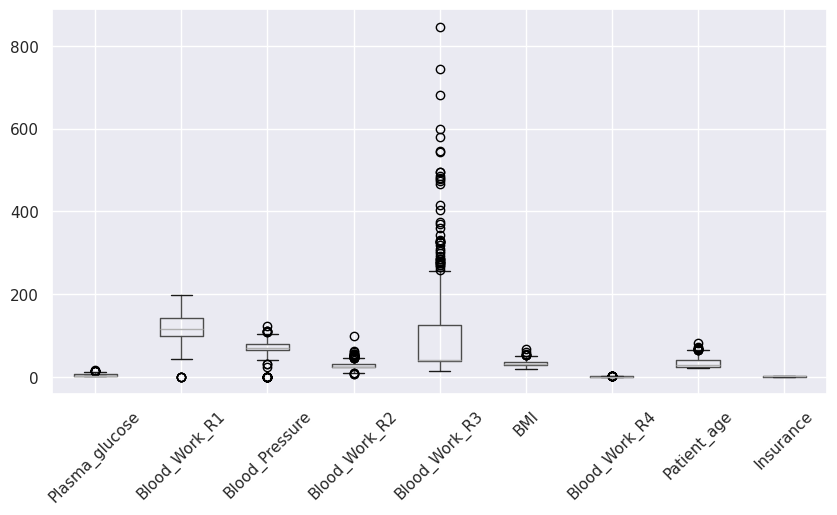

In [104]:
plt.figure(figsize=(10, 5))

# Plot the boxplot
train_data.boxplot()

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Display the plot
plt.show()

**Observation: All the numeric_columns except Insurance have outliers.**

**Removing the Outliers**

In [105]:
numeric_columns = train_data.select_dtypes(include=[np.number]).columns
num_data = train_data[numeric_columns]

Q1 = num_data.quantile(0.25)
Q3 = num_data.quantile(0.75)
IQR = Q3-Q1
IQR
((num_data< (Q1-1.5 * IQR)) | (num_data > (Q3 + 1.5 * IQR))).any()

,0
Plasma_glucose,True
Blood_Work_R1,True
Blood_Pressure,True
Blood_Work_R2,True
Blood_Work_R3,True
BMI,True
Blood_Work_R4,True
Patient_age,True
Insurance,False


In [106]:
# Specify the columns of interest
columns_of_interest =  ['BMI', 'Blood_Pressure', 'Blood_Work_R1','Blood_Work_R2','Blood_Work_R3','Blood_Work_R4','Patient_age','Plasma_glucose']

# Check if outliers still exist in the columns
outliers_exist = False

for column in columns_of_interest:
    # Calculate the first and third quartiles (Q1 and Q3)
    Q1 = train_data[column].quantile(0.25)
    Q3 = train_data[column].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Modify the values in the column to be within the range
    train_data[column] = train_data[column].clip(lower_bound, upper_bound)

    # Check if outliers exist in the column
    if (train_data[column] < lower_bound).any() or (train_data[column] > upper_bound).any():
        outliers_exist = True
        print(f"Outliers still exist in '{column}'.")

if not outliers_exist:
    print("No outliers exist in the specified columns.")

No outliers exist in the specified columns.


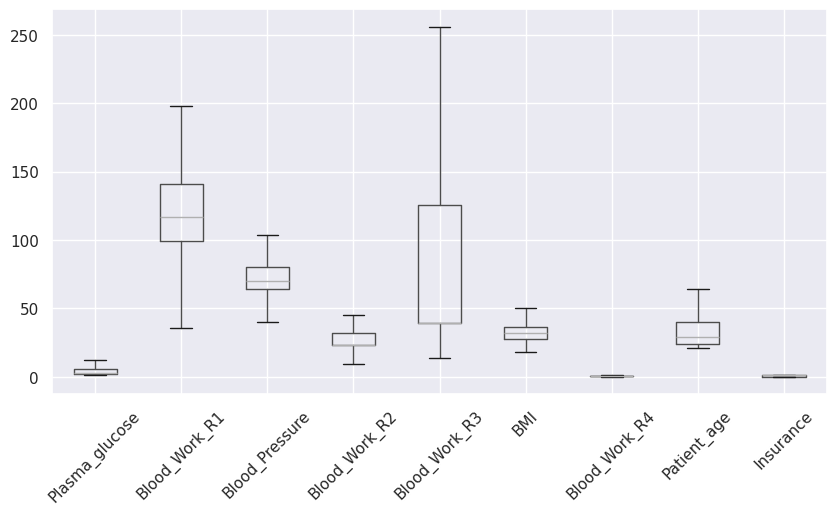

In [107]:
plt.figure(figsize=(10, 5))

# Plot the boxplot
train_data.boxplot()

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Display the plot
plt.show()

**Observation: Outliers has been removed**

 # **Univariate Analysis**

**Graphically Displaying all numerical columns using Histogram and their Distributions**

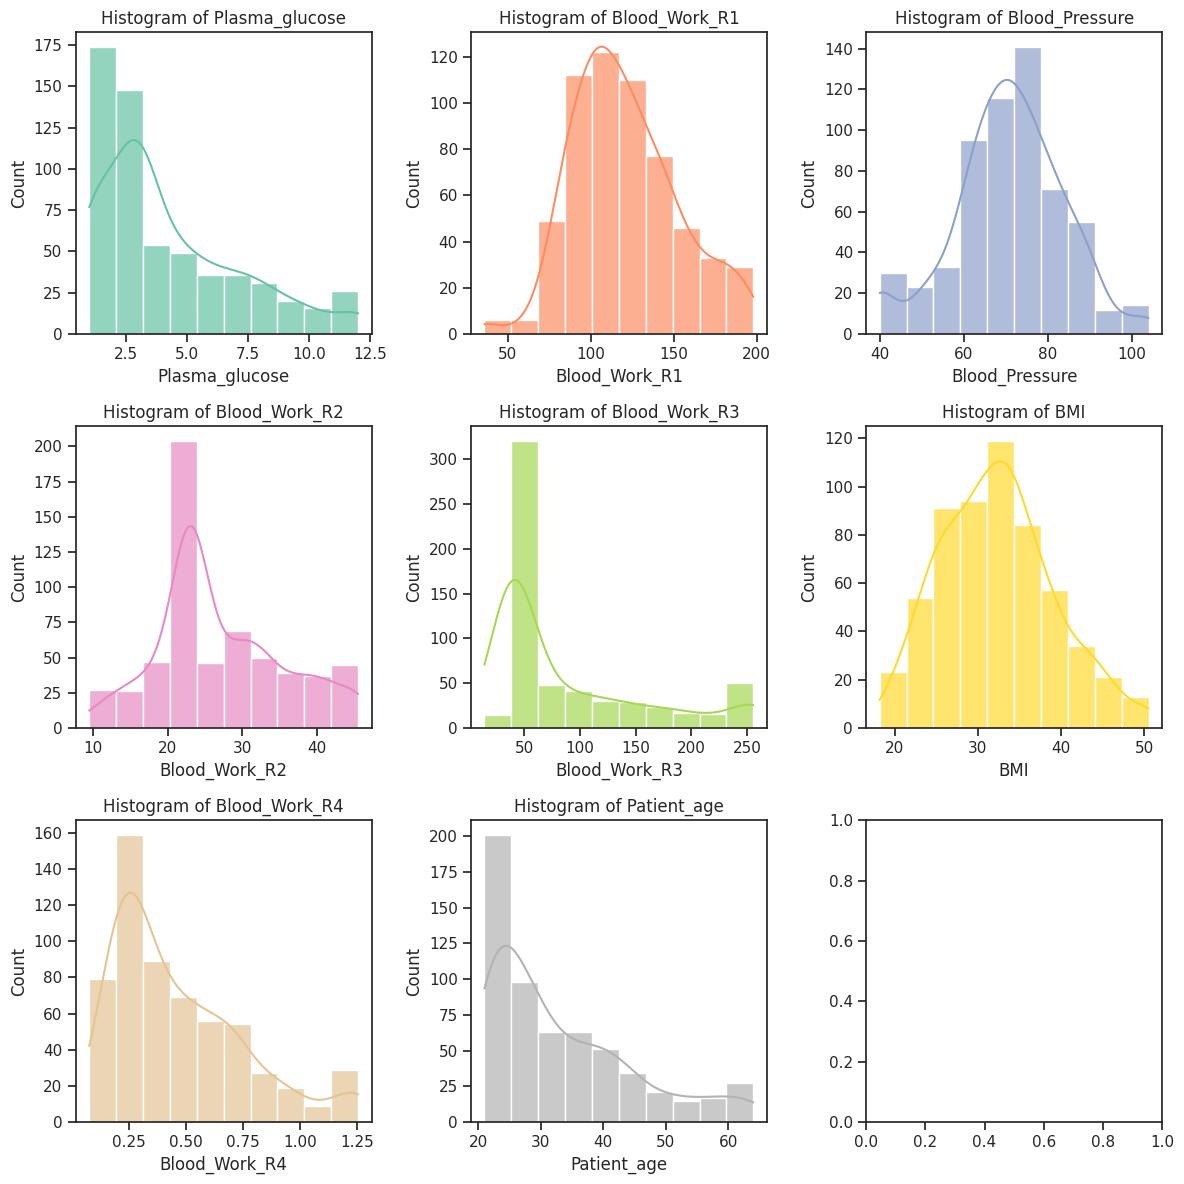

In [108]:
# Set the style for the plot
sns.set(style="ticks", color_codes=True)

# Create a grid of 3 by 3 subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Flatten the axes array
axes = axes.flatten()

# Generate a unique color for each numerical feature
colors = sns.color_palette("Set2", len(numerical_features))

# Plot histograms for each numerical column with its respective color
for i, col in enumerate(numerical_features):
    sns.histplot(data=train_data, x=col, kde=True, bins=10, ax=axes[i], color=colors[i], alpha=0.7)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

**Observations:**

Most patients showed up for blood work 1 and 3

Most patients have a blood pressure between 60 and 80

Most patients have glucose level less than five

The majority of patients are younger than 40.

# **Bivariate Analysis**

In [109]:
# Get a DataFrame for positive and another for neagtive cases
positive_cases = train_data[train_data['Sepsis'] == 'Positive']
negative_cases = train_data[train_data['Sepsis'] == 'Negative']

#**Age Analysis**

In [110]:
# Get summary statistics  for the 'Patient_age' column in positive sepsis cases
positive_age_stats = positive_cases['Patient_age'].describe()
positive_age_stats

,Patient_age
count,207.000000
mean,36.589372
std,10.800058
min,21.000000
25%,28.000000
50%,35.000000
75%,43.000000
max,64.000000


In [111]:
# Get summary statistics for the 'Patient_age' column in negative sepsis cases
negative_age_stats = negative_cases['Patient_age'].describe()
negative_age_stats

,Patient_age
count,383.000000
mean,31.548303
std,11.612285
min,21.000000
25%,23.000000
50%,27.000000
75%,37.000000
max,64.000000


In [112]:
# Extract the 'age' column from the DataFrame
ages_positive = positive_cases['Patient_age']
ages_negative = negative_cases['Patient_age']

positive_mean_age = positive_age_stats['mean']

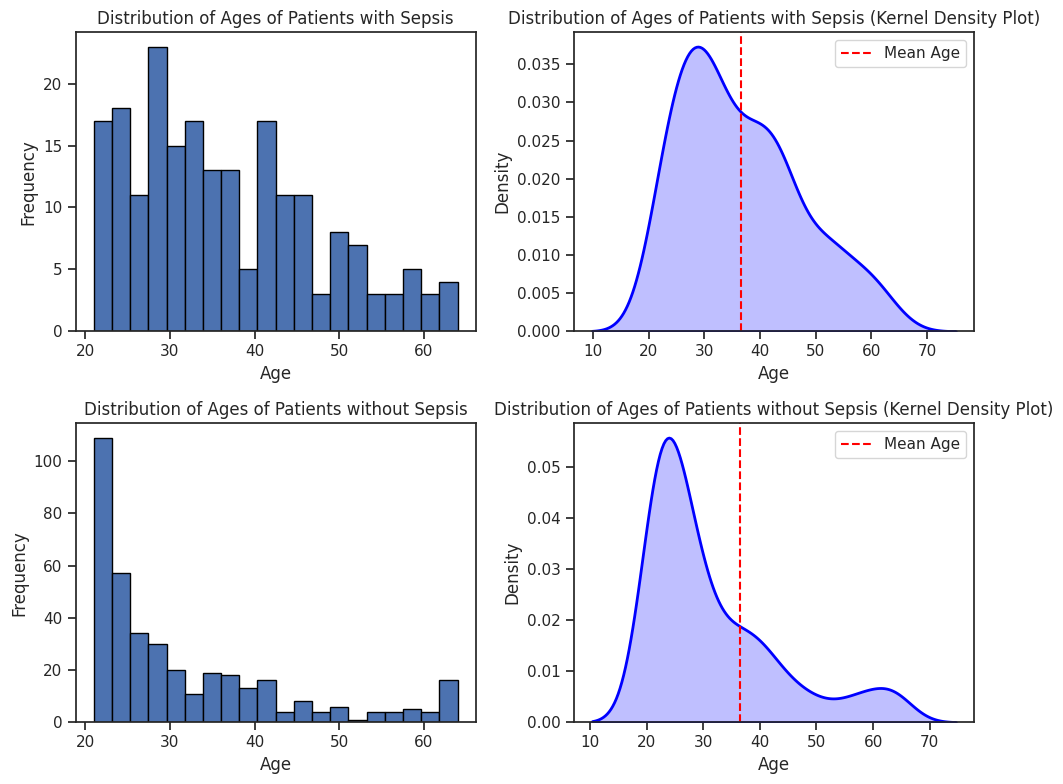

In [113]:
# Extract the 'age' column from the DataFrame
ages_positive = positive_cases['Patient_age']
ages_negative = negative_cases['Patient_age']

positive_mean_age = positive_age_stats['mean']

# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot 1: Distribution of Ages for Patients with Sepsis
axes[0, 0].hist(ages_positive, bins=20, edgecolor='black')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Ages of Patients with Sepsis')

sns.kdeplot(ages_positive, shade=True, color='blue', linewidth=2, ax=axes[0, 1])
axes[0, 1].axvline(positive_mean_age, color='red', linestyle='--', label='Mean Age')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Density')
axes[0, 1].set_title('Distribution of Ages of Patients with Sepsis (Kernel Density Plot)')
axes[0, 1].legend()

# Plot 2: Distribution of Ages for Patients without Sepsis
axes[1, 0].hist(ages_negative, bins=20, edgecolor='black')
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Ages of Patients without Sepsis')

sns.kdeplot(ages_negative, shade=True, color='blue', linewidth=2, ax=axes[1, 1])
axes[1, 1].axvline(positive_mean_age, color='red', linestyle='--', label='Mean Age')
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Density')
axes[1, 1].set_title('Distribution of Ages of Patients without Sepsis (Kernel Density Plot)')
axes[1, 1].legend()

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

**Observation:**
The younger patients have more cases of Negative sepsis than older ones.

This suggests that our Null Hypothesis(Age does not determine whether a patient will develop Sepsis) is incorrect.

# **BMI Analysis**

In [114]:
# Generate descriptive statistics for the BMI of individuals who tested positive
positive_bmi_stats = positive_cases['BMI'].describe()
positive_bmi_stats

,BMI
count,207.000000
mean,35.378623
std,6.216960
min,22.900000
25%,31.050000
50%,34.300000
75%,39.050000
max,50.512500


In [115]:
# Generate descriptive statistics for the BMI of individuals who tested negative
negative_bmi_stats = negative_cases['BMI'].describe()
negative_bmi_stats

,BMI
count,383.000000
mean,30.700033
std,6.540889
min,18.200000
25%,25.450000
50%,30.100000
75%,35.150000
max,50.512500


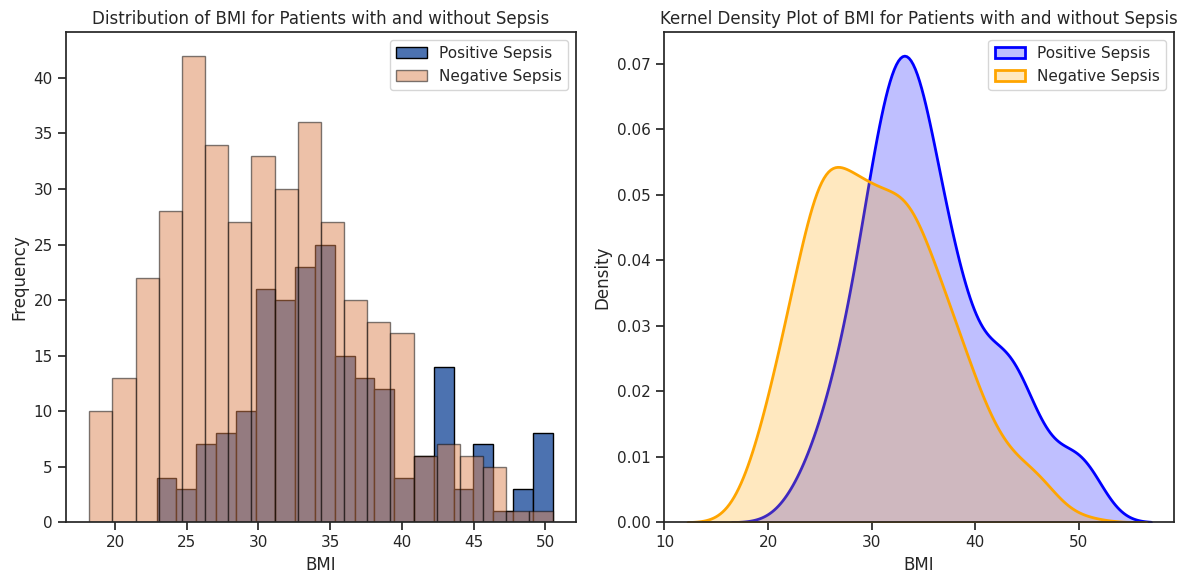

In [116]:
# Extract the 'BMI' column from the DataFrame
bmi_positive = positive_cases['BMI']
bmi_negative = negative_cases['BMI']

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1: Distribution of BMI for Patients with and without Sepsis
axes[0].hist(bmi_positive, bins=20, edgecolor='black', label='Positive Sepsis')
axes[0].hist(bmi_negative, bins=20, edgecolor='black', alpha=0.5, label='Negative Sepsis')
axes[0].set_xlabel('BMI')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of BMI for Patients with and without Sepsis')
axes[0].legend()

# Plot 2: Kernel Density Plot of BMI for Patients with and without Sepsis
sns.kdeplot(bmi_positive, shade=True, color='blue', linewidth=2, label='Positive Sepsis', ax=axes[1])
sns.kdeplot(bmi_negative, shade=True, color='orange', linewidth=2, label='Negative Sepsis', ax=axes[1])
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('Density')
axes[1].set_title('Kernel Density Plot of BMI for Patients with and without Sepsis')
axes[1].legend()

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

**Observation:** Patients with lower BMI are less likely to have sepsis

# **Heatmap Analysis**

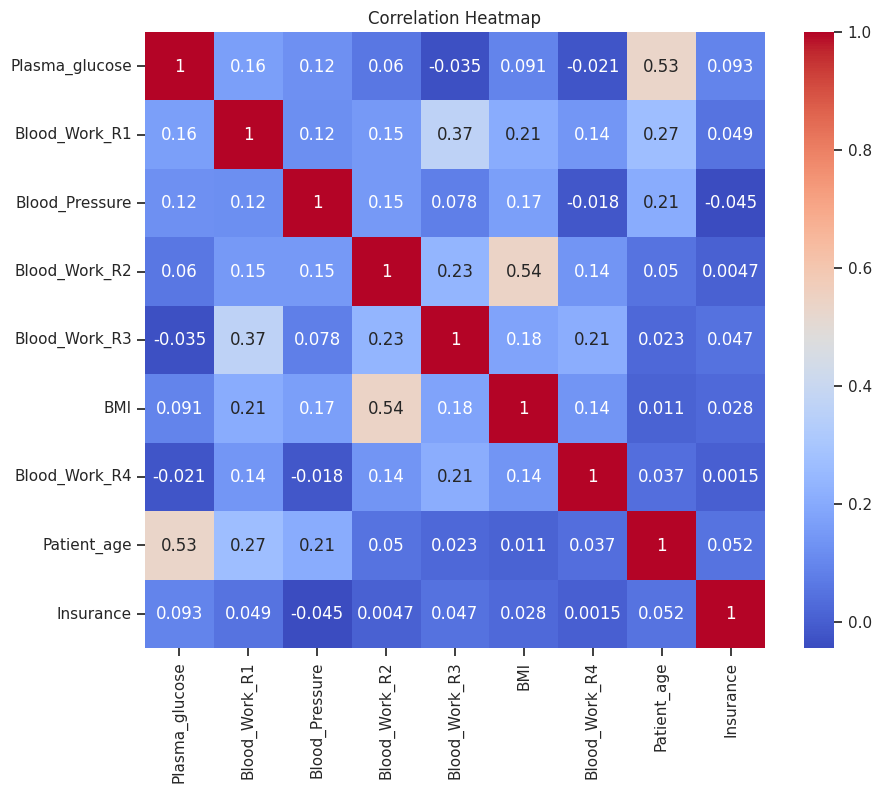

In [117]:
# Plotting a correlation heatmap for numerical features to visualize relationships between variables
plt.figure(figsize=(10, 8))
sn.heatmap(num_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [118]:
# Calculate the correlation matrix
correlation_matrix = num_data.corr()

# Set the threshold for high correlation
threshold = 0.5

# Find the highly correlated variables
high_correlation = (correlation_matrix.abs() > threshold) & (correlation_matrix != 1)

# Get the variable pairs with high correlation
high_correlation_pairs = [(i, j) for i in high_correlation.columns for j in high_correlation.columns if high_correlation.loc[i, j]]

# Print the highly correlated variables
for pair in high_correlation_pairs:
    var1, var2 = pair
    correlation_value = correlation_matrix.loc[var1, var2]
    print(f"{var1} and {var2} are highly correlated (correlation value: {correlation_value})")

Plasma_glucose and Patient_age are highly correlated (correlation value: 0.5307618646199184)
Blood_Work_R2 and BMI are highly correlated (correlation value: 0.5420169830360818)
BMI and Blood_Work_R2 are highly correlated (correlation value: 0.5420169830360818)
Patient_age and Plasma_glucose are highly correlated (correlation value: 0.5307618646199184)


For each pair of columns that has a correlation of 0.5 and above,

i will later drop one column from each pair

While a correlation coefficient measures linear relationships, there might be non-linear relationships

between the variables that are not captured by the correlation coefficient alone.

# **Scatter Plot Analysis**

**Using scatter for futher analysis**

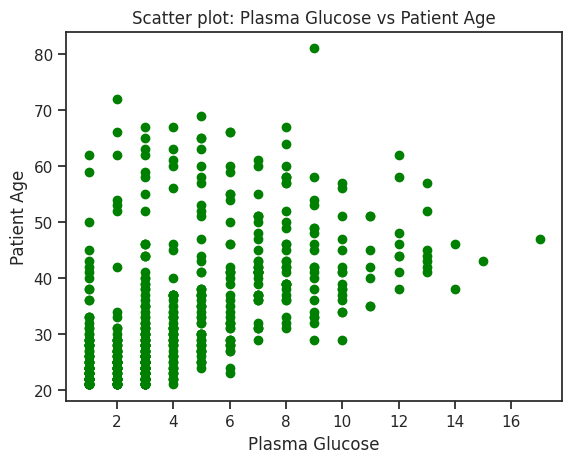

In [119]:
# Scatter plot: Plasma_glucose vs Patient_age
plt.scatter(num_data['Plasma_glucose'], num_data['Patient_age'], color='green')
plt.xlabel('Plasma Glucose')
plt.ylabel('Patient Age')
plt.title('Scatter plot: Plasma Glucose vs Patient Age')
plt.show()

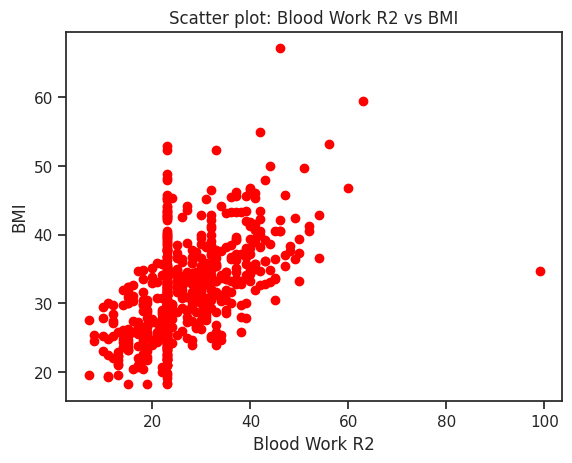

In [120]:
# Scatter plot: Blood_Work_R2 vs BMI
plt.scatter(num_data['Blood_Work_R2'], num_data['BMI'], color='red')
plt.xlabel('Blood Work R2')
plt.ylabel('BMI')
plt.title('Scatter plot: Blood Work R2 vs BMI')
plt.show()

**Observations:** The data points in Plasma_glucose and Patient_age are widely scattered, A tight cluster suggests a strong relationship, while a wide dispersion indicates a weak relationship or no relationship at all.

The data points in Blood_Work_R2 and BMI are close together and have a linear positive relationship. So we will explore this further.

# **P-value Calculation**

In [121]:
# Calculate the p-value for the correlation between Blood_Work_R2 and BMI
blood_work_r2 = num_data['Blood_Work_R2']
bmi = num_data['BMI']
corr, p_value = stats.pearsonr(blood_work_r2, bmi)
print("p-value (Blood_Work_R2 and BMI):", p_value)

p-value (Blood_Work_R2 and BMI): 2.340075984885728e-46


In [122]:
# use spearman's test to confirm
corr2, p_value2 = stats.spearmanr(blood_work_r2, bmi)
print("p-value2 (Blood_Work_R2 and BMI):", p_value2)

p-value2 (Blood_Work_R2 and BMI): 2.1442057355491957e-53


The both p-values are significantly smaller than a typical significance level of 0.05

so there is a statistically significant correlation between Blood_Work_R2 and BMI.

# **Boxplot Analysis of Numeric Features by Sepsis Status**

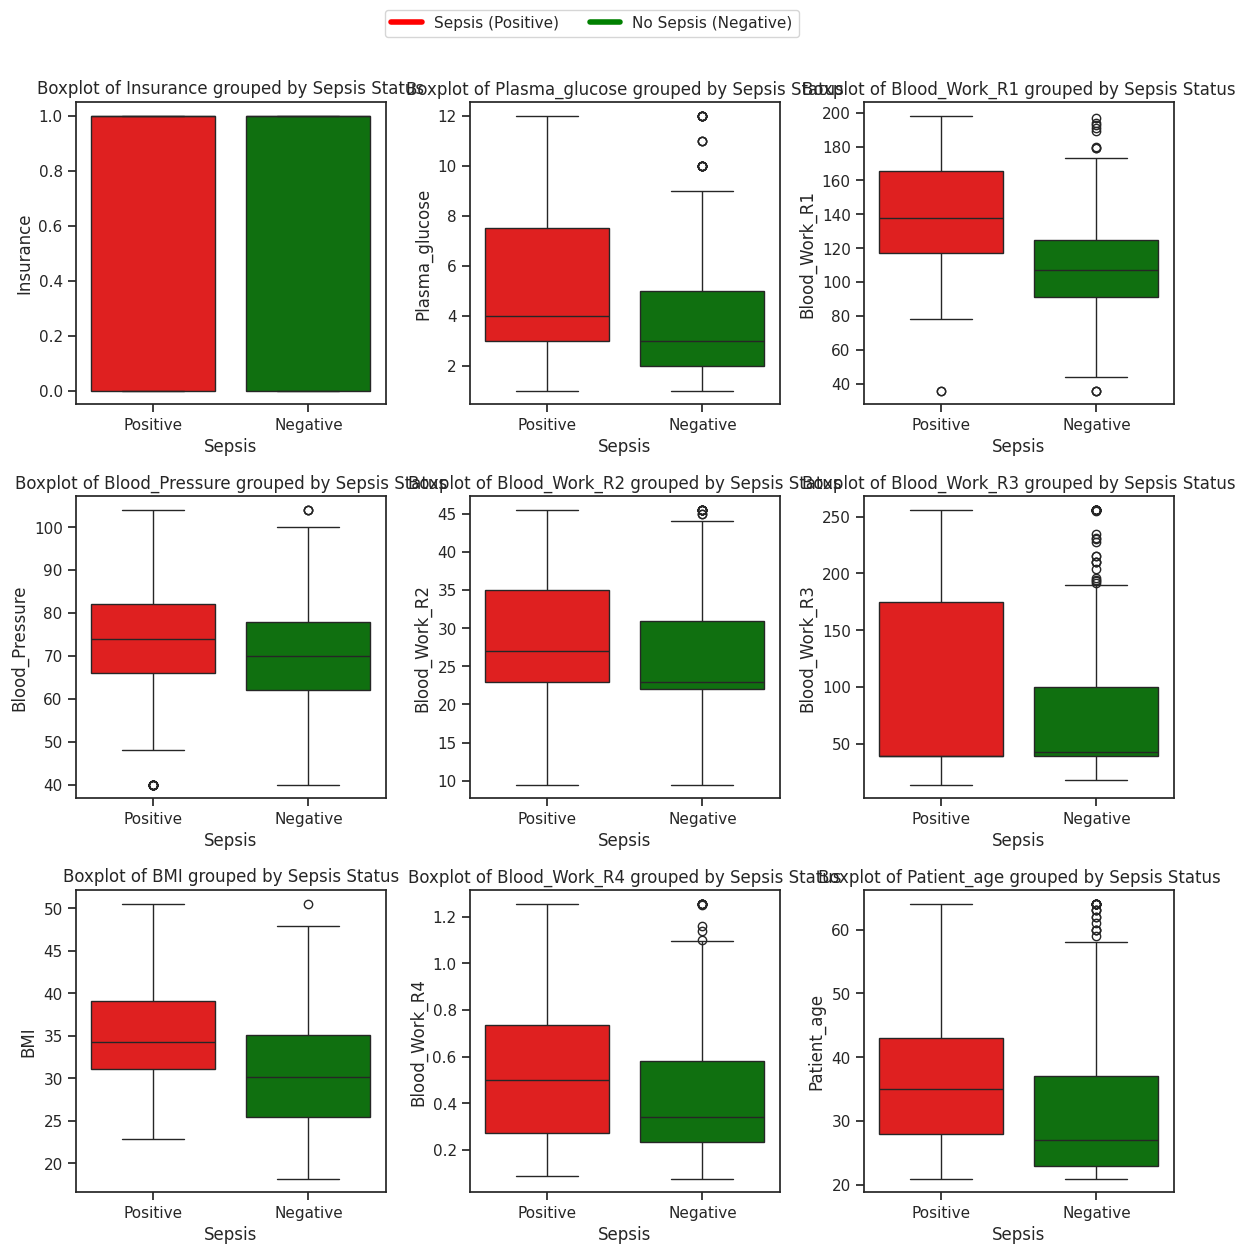

In [123]:
# Define the numeric columns
numeric_columns = ['Insurance', 'Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure',
                   'Blood_Work_R2', 'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Patient_age']

# Define color mapping (Ensures Sepsis = Red, No Sepsis = Green)
# Changing the keys to 'Negative' and 'Positive' to match the values in the 'Sepsis' column
color_mapping = {'Negative': 'green', 'Positive': 'red'}

# Define the layout grid
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Iterate over the numeric columns
for i, column in enumerate(numeric_columns):
    # Calculate the row and column indices in the grid
    row = i // 3
    col = i % 3

    # Create the boxplot with the fixed color mapping
    sns.boxplot(x='Sepsis', y=column, data=train_data, ax=axes[row, col], palette=color_mapping)

    # Set the title
    axes[row, col].set_title(f'Boxplot of {column} grouped by Sepsis Status')

# Create a correct legend with matching colors
handles = [plt.Line2D([0], [0], color='red', lw=4, label='Sepsis (Positive)'),
           plt.Line2D([0], [0], color='green', lw=4, label='No Sepsis (Negative)')]

# Add the legend outside the grid
fig.legend(handles=handles, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2)

# Adjust the layout and spacing
plt.tight_layout()

# Show the plots
plt.show()

# **Insurance Distribution by Sepsis Status**

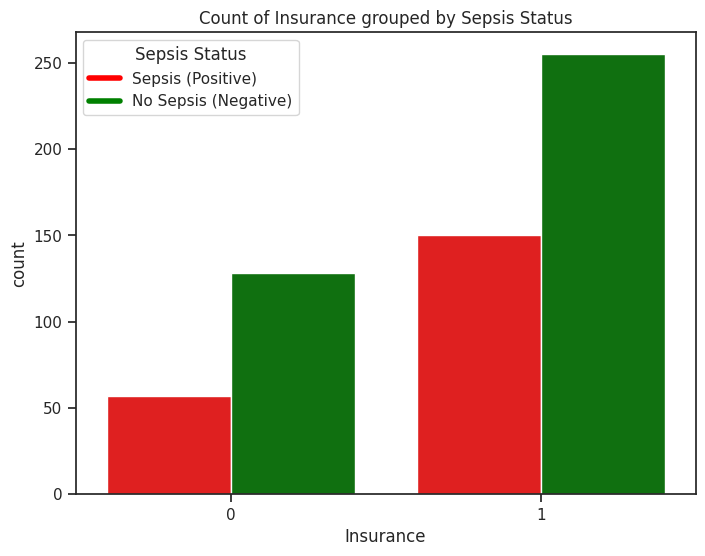

In [124]:
# Define color mapping (Ensures Sepsis = Red, No Sepsis = Green)
color_mapping = {'Negative': 'green', 'Positive': 'red'}  # Changed to match 'Sepsis' column values

# Set the figure size
plt.figure(figsize=(8, 6))

# Create a count plot with the fixed color mapping
sns.countplot(x='Insurance', hue='Sepsis', data=train_data, palette=color_mapping)

# Set the title
plt.title('Count of Insurance grouped by Sepsis Status')

# Create a correct legend with matching colors
handles = [plt.Line2D([0], [0], color='red', lw=4, label='Sepsis (Positive)'),
           plt.Line2D([0], [0], color='green', lw=4, label='No Sepsis (Negative)')]

# Add the legend
plt.legend(handles=handles, title='Sepsis Status')

# Show the plot
plt.show()

Observation: Insurance is irrelevant since it is Sepsis status doesn't change if you have insurance or not

so i will drop the insurance column later as well

# **Understanding P-Value and T-Statistic and  T-Test for Sepsis Patients Age**

What is P-value and t-statistic? The p-value is like a "strength meter" for our data. It tells us how strong the evidence is against a particular idea. A small p-value means the evidence is strong and suggests that our idea is likely true, while a large p-value means the evidence is weak and our idea may not be true.

The t-statistic is like a "difference detector" between two groups. It measures how different the average values are between two groups and compares it to the variation within each group. A larger t-statistic means there is a bigger difference between the groups being compared.

In simpler terms, the p-value helps us decide if our idea is likely true or not, and the t-statistic tells us how big the difference is between two groups.

# **Performing an independent samples t-test to compare the ages of patients with positive and negative Sepsis.**

In [125]:
# Splitting the data into two groups based on the Sepsis variable
Sepsis_positive = train_data[train_data['Sepsis'] == 'Positive']
Sepsis_negative= train_data[train_data['Sepsis'] == 'Negative']

# Extracting the Age(Patient_age) values for each group
age_Sepsis_positive = Sepsis_positive['Patient_age']
age_Sepsis_negative = Sepsis_negative['Patient_age']

# Performing independent samples t-test
t_statistic, p_value = ttest_ind(age_Sepsis_positive, age_Sepsis_negative)

# Print the results
print("P-Value:", p_value)
print("T-Statistic:", t_statistic)

P-Value: 3.4577022949183645e-07
T-Statistic: 5.1556614056454775


**Interpreting the results:**
A very small p-value of 3.4577022949183645e-07, we can conclude that there is a significant difference in the mean age between patients with and without Sepsis.

A large t-statistic of 5.1556614056454775 means there is a bigger difference between the groups being compared.

Null Hypothesis: Age does not determine whether a patient will develop Sepsis.

Null Hypothesis Rejected.

**Conclusion:**
Age is a strong predictor of sepsis, but it does not directly cause it. Instead, older age likely contributes to a higher risk due to underlying health conditions and immune function changes.

# **Corelation between the Sepssis status and the other attributes.**

In [126]:
# Replace "Positive" with 1 and "Negative" with 0
train_data['Sepsis'] = train_data['Sepsis'].replace({'Positive': 1, 'Negative': 0})

# Print the updated Data
train_data.head(5)

,ID,Plasma_glucose,Blood_Work_R1,Blood_Pressure,Blood_Work_R2,Blood_Work_R3,BMI,Blood_Work_R4,Patient_age,Insurance,Sepsis
0,ICU200010,6,148,72,35.0,39.0,33.6,0.627000,50,0,1
1,ICU200011,1,85,66,29.0,39.0,26.6,0.351000,31,0,0
2,ICU200012,8,183,64,23.0,39.0,23.3,0.672000,32,1,1
3,ICU200013,1,89,66,23.0,94.0,28.1,0.167000,21,1,0
4,ICU200014,3,137,40,35.0,168.0,43.1,1.253375,33,1,1


In [127]:
# Calculate the correlation between Sepssis status and other attributes
correlation_with_sepsis = train_data.drop('ID', axis=1).corr()['Sepsis'].drop('Sepsis')

# Set the threshold for significant correlation
threshold = 0.3

# Find the attributes with significant correlation to Sepssis status
significant_correlation = correlation_with_sepsis.abs() > threshold

# Get the attributes with significant correlation to Sepssis status
correlated_attributes = correlation_with_sepsis[significant_correlation]

# Print the attributes with significant correlation to Sepssis status
for attribute, correlation_value in correlated_attributes.items():
    print(f"{attribute} has a moderate correlation with Sepssis status (correlation value: {correlation_value})")

Blood_Work_R1 has a moderate correlation with Sepssis status (correlation value: 0.4614006382433301)
BMI has a moderate correlation with Sepssis status (correlation value: 0.32856225936850497)


# **Feature Processing and Engineering**

**Checking for Duplicates**

In [128]:
#Checking for duplicate rows in data
duplicate_rows = train_data.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

Number of duplicate rows: 0


**checking for missing values**

In [129]:
# Check for missing values in each column of the training dataset and print the total count per column
missing_values = train_data.isna().sum()
print(missing_values)

ID                0
Plasma_glucose    0
Blood_Work_R1     0
Blood_Pressure    0
Blood_Work_R2     0
Blood_Work_R3     0
BMI               0
Blood_Work_R4     0
Patient_age       0
Insurance         0
Sepsis            0
dtype: int64


**Droping Unnecessary Columns**

**Droping Blood_work_R2 since it is also highly correlated to BMI,the ID Column  and Insurance as it isnt a relevant field.**

In [130]:
# Drop the 'Blood_Work_R2', 'ID', and 'Insurance' columns from the training dataset
train_data_new = train_data.drop(['Blood_Work_R2', 'ID', 'Insurance'], axis=1)

In [131]:
# Displaying the new train data
train_data_new

,Plasma_glucose,Blood_Work_R1,Blood_Pressure,Blood_Work_R3,BMI,Blood_Work_R4,Patient_age,Sepsis
0,6,148,72,39.0,33.6,0.627000,50,1
1,1,85,66,39.0,26.6,0.351000,31,0
2,8,183,64,39.0,23.3,0.672000,32,1
3,1,89,66,94.0,28.1,0.167000,21,0
4,3,137,40,168.0,43.1,1.253375,33,1
...,...,...,...,...,...,...,...,...
594,6,123,72,230.0,33.6,0.733000,34,0
595,3,188,82,185.0,32.0,0.682000,22,1
596,3,67,76,39.0,45.3,0.194000,46,0
597,1,89,40,25.0,27.8,0.559000,21,0


# **Data Spliting**

In [132]:
# Using train_test_split with a random_state, and add stratify for Classification
# Split the  data into train and validation sets
X_train, X_test, y_train, y_test = train_test_split(train_data_new.iloc[:, :-1],
                                                    train_data_new.iloc[:, -1:],
                                                    test_size=0.2, random_state=42,
                                                    stratify=train_data_new.iloc[:, -1:])

In [133]:
# Displaying the shapes of the training and testing sets for features (X) and target labels (y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((472, 7), (118, 7), (472, 1), (118, 1))

In [134]:
# Displaying the training feature set (X_train)
X_train

,Plasma_glucose,Blood_Work_R1,Blood_Pressure,Blood_Work_R3,BMI,Blood_Work_R4,Patient_age
244,2,146,76,194.0,38.2000,0.329,29
5,5,116,74,39.0,25.6000,0.201,30
115,4,146,92,39.0,31.2000,0.539,61
123,5,132,80,39.0,26.8000,0.186,64
99,1,122,90,220.0,49.7000,0.325,31
...,...,...,...,...,...,...,...
125,1,88,40,99.0,50.5125,0.496,26
69,4,146,85,100.0,28.9000,0.189,27
112,1,89,76,37.0,31.2000,0.192,23
178,5,143,78,39.0,45.0000,0.190,47


In [135]:
# Displaying the training feature set (y_train)
y_train

,Sepsis
244,0
5,0
115,1
123,0
99,1
...,...
125,1
69,0
112,0
178,0


# **Data Imbalance Check**

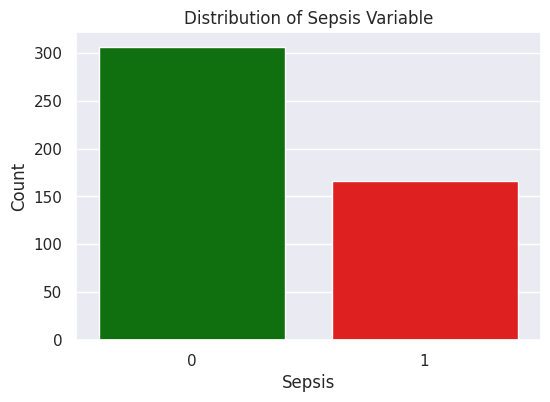

In [136]:
# Plot the distribution of the target variable 'Sepsis' in the training set to check for class imbalance
plt.figure(figsize=(6, 4))
sns.set(style="darkgrid")
sns.countplot(
    x='Sepsis',
    data=y_train,
    palette={'0': 'green', '1': 'red'}
)

plt.xlabel('Sepsis')
plt.ylabel('Count')
plt.title('Distribution of Sepsis Variable')
plt.show()

Dataset is imbalanced so we can't use Accuracy Score to choose our model.

**To solve this issue:** we'll Oversample our minority class using RandomOverSampler

In [137]:
# Create a DataFrame to represent y_train
y_train_data = pd.DataFrame(y_train, columns=['Sepsis'])

# Display the class distribution of the original y_train DataFrame
print("Original class distribution:")
print(y_train_data['Sepsis'].value_counts())

# Perform random oversampling on the training data
ros = RandomOverSampler(random_state=0)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Create a DataFrame to represent the resampled y_train
y_train_resampled_df = pd.DataFrame(y_train_resampled, columns=['Sepsis'])

# Display the class distribution of the resampled y_train DataFrame
print("\nResampled class distribution:")
print(y_train_resampled_df['Sepsis'].value_counts())

# Assign the resampled data to X_train and y_train
X_train, y_train = X_train_resampled, y_train_resampled

Original class distribution:
Sepsis
0    306
1    166
Name: count, dtype: int64

Resampled class distribution:
Sepsis
0    306
1    306
Name: count, dtype: int64


# **Feature Scaling**

In [138]:
# Create an instance of StandardScaler and set output to be a DataFrame
scaler = StandardScaler().fit(X_train).set_output (transform="pandas")

# Scale the training data
X_train_df = scaler.transform(X_train)

# Scale the test data using the same scaler
X_test_df = scaler.transform(X_test)

# **Machine Learning Section.**

Here in  this section iam going to build, train, evaluate and compare the models to each other.

*   Logistic Regression


*   XGBoost Classifier


*   Gradient Boosting Classifier Model

# **Model Training and Evalution**

**Logistic Regression**

In [139]:
# Creating the Logistic Regression model.
lr_model = LogisticRegression(random_state=42)

In [140]:
# Fitting the logistic regression model on the training data
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [141]:
# Predict the class labels for the test dataset using the fitted logistic regression model
pred = lr_model.predict(X_test)

# Predict the probability estimates for each class and select the probabilities for the positive class (class index 1)for ROC
prob = lr_model.predict_proba(X_test)[:, 1]

In [142]:
# Evaluating model performance using different metrics

# Calculate recall
r_lgt = recall_score(y_test, pred)
print("recall_score :", r_lgt)

# Calculate precision
p_lgt = precision_score(y_test, pred)
print("precision_score :", p_lgt)

# Calculate F1 score
f1_lgt = f1_score(y_test, pred)
print("f1_score :", f1_lgt)

# Calculate F2 score using the F-beta score metric:
# beta=2 emphasizes recall more than precision, as the weight on recall is higher.
f2_lgt = fbeta_score(y_test, pred, beta=2, average='binary')
print("f2_score :", f2_lgt)

# Calculate accuracy
A_lgt = accuracy_score(y_test, pred)
print("accuracy_score :", A_lgt)

# Calculate the ROC AUC score.
acu_lgt = roc_auc_score(y_test, pred)
print("ROC_AUC Score:", acu_lgt)

recall_score : 0.7560975609756098
precision_score : 0.62
f1_score : 0.6813186813186813
f2_score : 0.7242990654205608
accuracy_score : 0.7542372881355932
ROC_AUC Score: 0.7546721571111815


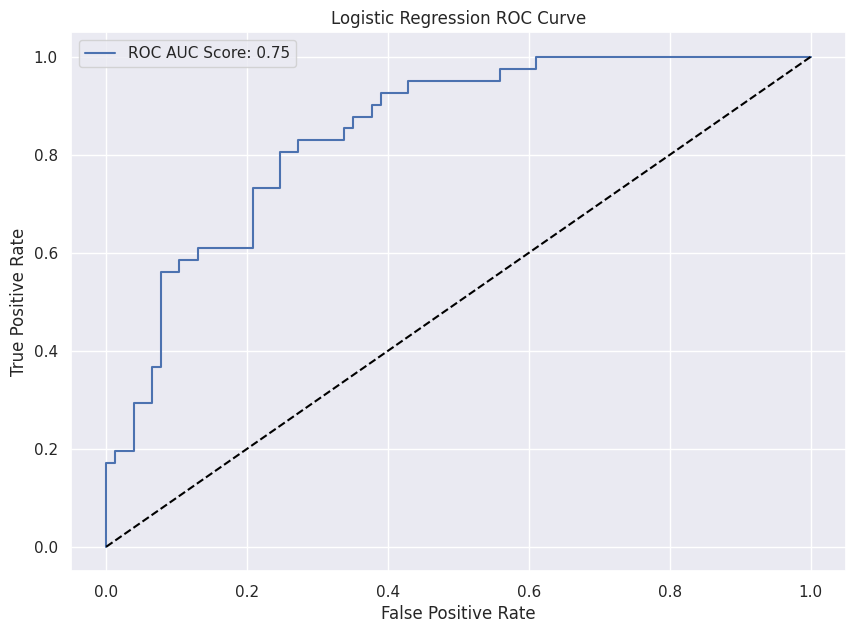

In [143]:
# Calculate the ROC metrics:
# Calculate the false positive rate (fpr) and true positive rate (tpr) using the true labels and predicted probabilities
fpr, tpr, _ = roc_curve(y_test, prob)

# Plotting  the ROC curve
plt.figure(figsize=(10, 7))
plt.title('Logistic Regression ROC Curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr, tpr, label=f'ROC AUC Score: {acu_lgt:.2f}')
plt.plot([0, 1], [0, 1], linestyle="--", color='black')
plt.legend()

plt.show()

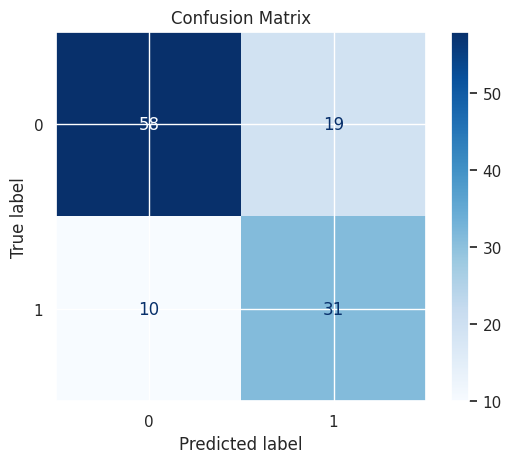

In [144]:
# Compute the confusion matrix using the true labels (y_test) and predicted labels (pred)
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix using a blue color map and integer formatting for values
disp.plot(cmap='Blues', values_format='d')

plt.title("Confusion Matrix")
plt.show()

In [145]:
# Hyperparameter tuning using RandomizedSearchCV with Stratified K-Fold
param_distributions = {
    'C': uniform(0.001, 10),
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'max_iter': [100, 200, 500]}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(
    lr_model,
    param_distributions,
    n_iter=20,
    cv=cv,
    scoring='f1',
    n_jobs=-1,
    random_state=42)
random_search.fit(X_train, y_train)

# Displaying best parameters
print("Best Parameters:", random_search.best_params_)
print("Best F1 Score:", random_search.best_score_)

# saving the best Parameters
best_params_lgt = random_search.best_params_

Best Parameters: {'C': np.float64(2.1243911067827614), 'max_iter': 100, 'solver': 'liblinear'}
Best F1 Score: 0.7282544615033488


**XGBoost Classifier**

In [146]:
# Creating the XGBoost model
xgb_model = XGBClassifier(n_estimators=200, random_state=42)

In [147]:
# Fitting the XGBoost model on the training data
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [148]:
# Using the XGBoost classifier to predict the class labels for the test dataset
xg_pred = xgb_model.predict(X_test)

# Predicting the class probabilities for the test dataset
xg_prob = xgb_model.predict_proba(X_test)[:, 1]

In [149]:
# Evaluate XGBoost model performance using various metrics:

# Calculate recall
r_xg = recall_score(y_test, xg_pred)
print("recall_score : ", r_xg)

# Calculate precision
p_xg = precision_score(y_test, xg_pred)
print("precision_score :", p_xg)

# Calculate the F1 score
f1_xg = f1_score(y_test, xg_pred)
print("f1_score :", f1_xg)

# Calculate the F2 score: similar to F1 but with beta=2 to place more emphasis on recall.
f2_xg = fbeta_score(y_test, xg_pred, beta=2, average='binary')
print("f2_score :", f2_xg)

# Calculate accuracy
A_xg = accuracy_score(y_test, xg_pred)
print("accuracy_score :", A_xg)

# Calculate ROC AUC Score
acu_xg = roc_auc_score(y_test, xg_pred)
print("ROC_AUC Score:", acu_xg)

recall_score :  0.7804878048780488
precision_score : 0.64
f1_score : 0.7032967032967034
f2_score : 0.7476635514018691
accuracy_score : 0.7711864406779662
ROC_AUC Score: 0.7733607855559076


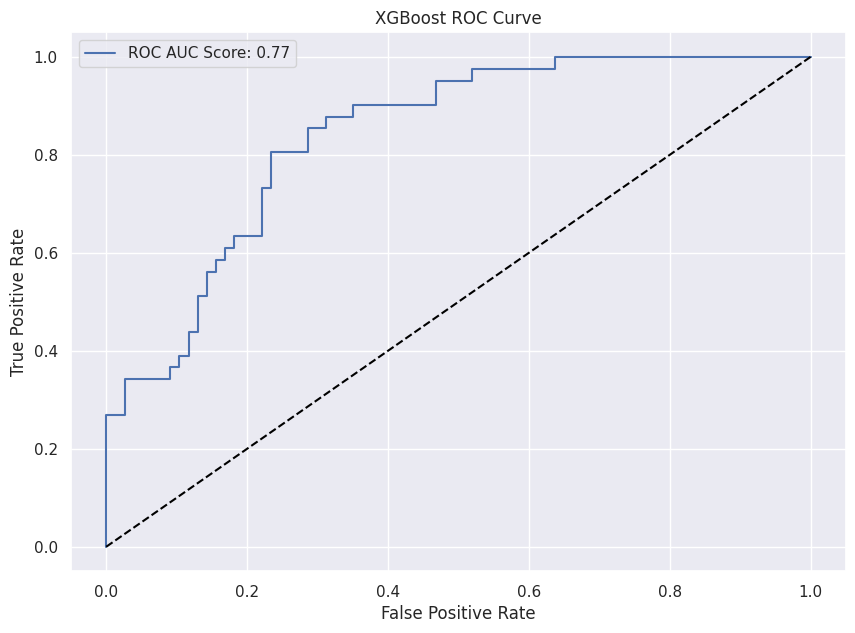

In [150]:
# Calculate the ROC metrics:
# Calculate the false positive rate (fpr) and true positive rate (tpr) using the true labels and predicted probabilities
fpr, tpr, _ = roc_curve(y_test, xg_prob)

# Plotting  the ROC curve
plt.figure(figsize=(10, 7))
plt.title('XGBoost ROC Curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr, tpr, label=f'ROC AUC Score: {acu_xg:.2f}')
plt.plot([0, 1], [0, 1], linestyle="--", color='black')
plt.legend()

plt.show()

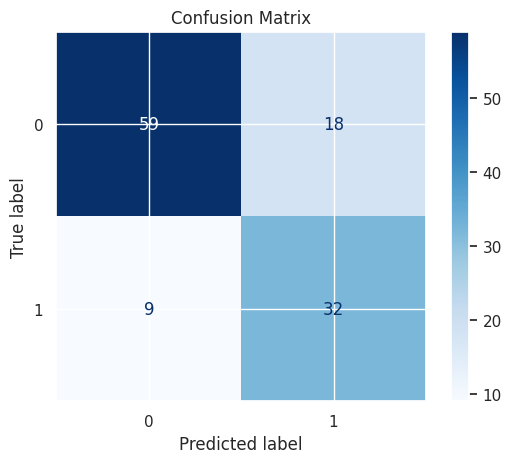

In [151]:
# Confusion Matrix
# Compute the confusion matrix using true labels (y_test) and predicted labels (xg_pred)
cm = confusion_matrix(y_test, xg_pred)

# Create a display object for the confusion matrix using the computed matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix using a blue color map and formatting the values as integers
disp.plot(cmap='Blues', values_format='d')

# Set the title of the plot to provide context about the displayed information
plt.title("Confusion Matrix")

# Display the plot on the screen
plt.show()

In [152]:
# Hyperparameter tuning using RandomizedSearchCV with Stratified K-Fold
param_distributions = {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.5, 0.9),
    'colsample_bytree': uniform(0.5, 0.9),
    'gamma': uniform(0, 0.2),
    'reg_lambda': uniform(0, 1)}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    param_distributions,
    n_iter=20,  # Number of random samples
    cv=cv,
    scoring='f1',
    n_jobs=-1,
    random_state=42)
random_search.fit(X_train, y_train)

# Displaying best parameters
print("Best Parameters:", random_search.best_params_)
print("Best F1 Score:", random_search.best_score_)

Best Parameters: {'colsample_bytree': np.float64(0.8370861069626263), 'gamma': np.float64(0.19014286128198324), 'learning_rate': np.float64(0.15639878836228102), 'max_depth': 7, 'n_estimators': 120, 'reg_lambda': np.float64(0.15601864044243652), 'subsample': np.float64(0.6403950683025824)}
Best F1 Score: 0.8549401306945047


**Gradient Boosting Classifier**

In [153]:
# creating the Gradient Boosting Model
gbc = GradientBoostingClassifier(random_state=42)

In [154]:
# Fitting  the model on the trained data.
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [155]:
# Predict on the test dataset
gbc_pred = gbc.predict(X_test)
gbc_prob = gbc.predict_proba(X_test)[:,1]

In [156]:
# Model evaluation metrics for Gradient Boosting Classifier predictions

# Calculate For Recall
r_gbc = recall_score(y_test, gbc_pred)
print("Recall Score:", r_gbc)

# Calculate For Precision
p_gbc = precision_score(y_test, gbc_pred)
print("Precision Score:", p_gbc)

# Calculate For F1 Score
f1_gbc = f1_score(y_test, gbc_pred)
print("F1 Score:", f1_gbc)

# Calculate For F2 Score
f2_gbc = fbeta_score(y_test, gbc_pred, beta=2, average='binary')
print("F2 Score:", f2_gbc)

# Calculate For Accuracy
A_gbc = accuracy_score(y_test, gbc_pred)
print("Accuracy Score:", A_gbc)

# Calculate For ROC AUC Score
acu_gbc = roc_auc_score(y_test, gbc_pred)
print("ROC AUC Score:", acu_gbc)


Recall Score: 0.7560975609756098
Precision Score: 0.6078431372549019
F1 Score: 0.6739130434782609
F2 Score: 0.7209302325581395
Accuracy Score: 0.7457627118644068
ROC AUC Score: 0.748178650617675


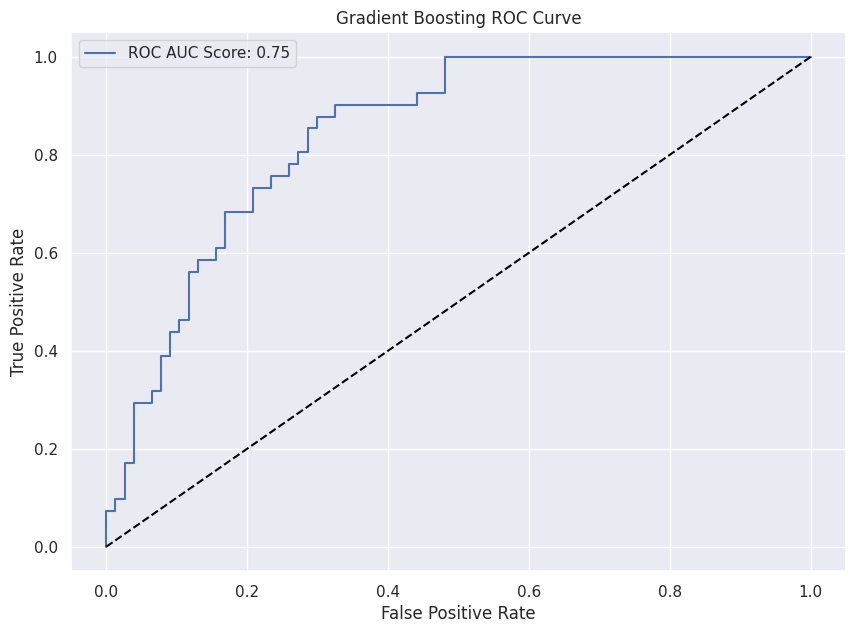

In [157]:
# Calculate the ROC metrics:
# Calculate the false positive rate (fpr) and true positive rate (tpr) using the true labels and predicted probabilities
fpr, tpr, _ = roc_curve(y_test, gbc_prob)

# Plotting  the ROC curve
plt.figure(figsize=(10, 7))
plt.title('Gradient Boosting ROC Curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr, tpr, label=f'ROC AUC Score: {acu_gbc:.2f}')
plt.plot([0, 1], [0, 1], linestyle="--", color='black')
plt.legend()
plt.show()

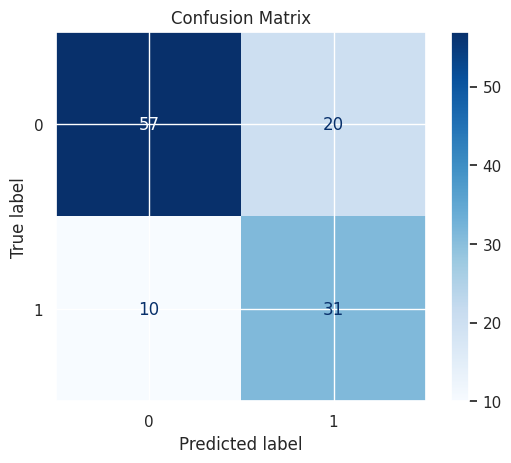

In [158]:
# Compute confusion matrix: counts of true vs. predicted labels
cm = confusion_matrix(y_test, gbc_pred)

# Create a display object for the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix with a blue colormap and integer labels
disp.plot(cmap='Blues', values_format='d')

# Add a title and render the plot
plt.title("Confusion Matrix")
plt.show()

In [159]:
# Hyperparameter tuning using RandomizedSearchCV with Stratified K-Fold
param_distributions = {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.5, 1.0),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10)}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(
    gbc,
    param_distributions,
    n_iter=20,  # Number of random samples
    cv=cv,
    scoring='f1',
    n_jobs=-1,
    random_state=42)
random_search.fit(X_train, y_train)

#  Display best parameters
print("Best Parameters:", random_search.best_params_)
print("Best F1 Score:", random_search.best_score_)

Best Parameters: {'learning_rate': np.float64(0.10335257864959599), 'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 120, 'subsample': np.float64(0.950499251969543)}
Best F1 Score: 0.8616999468763128


# Best Model(Gradient Boosting)

In [160]:
# Assign the model name before storing it in best_models
model_name = "Gradient Boosting"

# Initialize best_models and best_scores as empty dictionaries
best_models = {}
best_scores = {}

# Store the best model, score, and F1 score
best_models[model_name] = random_search.best_estimator_
best_scores[model_name] = random_search.best_score_  # This is the F1 score

# Find the best model overall
best_model_name = max(best_scores, key=best_scores.get)
best_model = best_models[best_model_name]

print("\nBest Model After Hyperparameter Tuning:")
print(f"{best_model_name} with F1 Score: {best_scores[best_model_name]:.4f}")
print("Best Parameters:", best_model.get_params())


Best Model After Hyperparameter Tuning:
Gradient Boosting with F1 Score: 0.8617
Best Parameters: {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': np.float64(0.10335257864959599), 'loss': 'log_loss', 'max_depth': 7, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 8, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 120, 'n_iter_no_change': None, 'random_state': 42, 'subsample': np.float64(0.950499251969543), 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


# **Saving The Best Model(Gradient Boosting) and The Scaler.**

In [161]:
# Save the best model
best_model = random_search.best_estimator_
model_filename = "Sepsis_gb_model.pkl"
joblib.dump(best_model, model_filename)

# Save the scaler
scaler_filename = "sepsis_scaler.pkl"
joblib.dump(scaler, scaler_filename)

['sepsis_scaler.pkl']

# **Evalution on Test Data and Classification Report**

In [162]:
# Evaluate on test data
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("\n Final Model Performance:")
print(f" Estimator Score: {best_model.score(X_test, y_test):.4f}")
print(f" Accuracy Score: {accuracy:.4f}")
print("\n Classification Report:\n")
print(classification_report(y_test, y_pred))


 Final Model Performance:
 Estimator Score: 0.7542
 Accuracy Score: 0.7542

 Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.77      0.80        77
           1       0.62      0.73      0.67        41

    accuracy                           0.75       118
   macro avg       0.73      0.75      0.74       118
weighted avg       0.77      0.75      0.76       118



# **Feature Importance**


 Generating SHAP feature importance for: Gradient Boosting


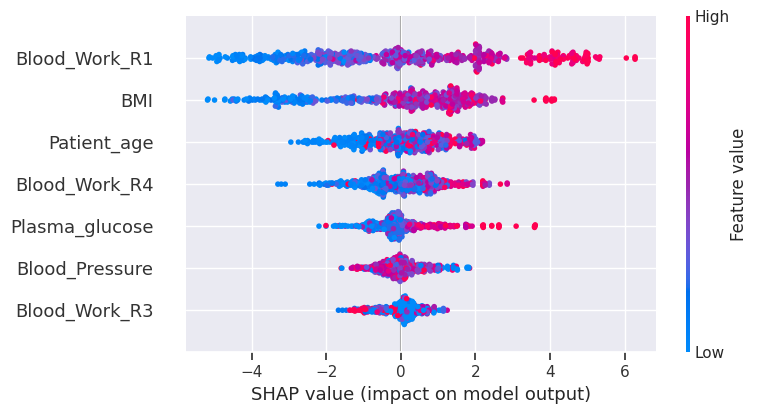

In [163]:
# SHAP Feature Importance
# Using the best model (Gradient Boosting) for Feature Importance
print(f"\n Generating SHAP feature importance for: {best_model_name}")

# Use TreeExplainer for Gradient Boosting
explainer = shap.TreeExplainer(best_model)  # Use TreeExplainer for tree-based models
shap_values = explainer.shap_values(X_train)

# SHAP Summary Plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_train)
plt.show()